In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asteroid-dataset/dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/asteroid-dataset/dataset.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
df.drop(['id', 'spkid', 'full_name', 'pdes', 'prefix', 'name'], axis = 1, inplace = True) #Not useful to our dataset

In [6]:
ne = pd.get_dummies(df['neo'], drop_first = True, columns = ['neo'])
pha = pd.get_dummies(df['pha'], drop_first = True, columns = ['Y'])

In [7]:
ne = ne.rename(columns = {'Y': 'neo'})

In [8]:
df = pd.concat([df.drop('neo', axis = 1), ne], axis = 1)

In [9]:
df = pd.concat([df.drop('pha', axis = 1), pha], axis = 1)

In [10]:
df.head()

,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,...,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,neo,Y
0,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,...,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301,0,0
1,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,...,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936,0,0
2,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,...,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848,0,0
3,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,...,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980,0,0
4,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,...,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191,0,0


In [11]:
df.isnull().sum()/958524 #Diameter, albedo, and diamter_sigma are missing way too many of their values so I'll just get rid of them

H                 0.006534
diameter          0.857897
albedo            0.859051
diameter_sigma    0.858031
orbit_id          0.000000
epoch             0.000000
epoch_mjd         0.000000
epoch_cal         0.000000
equinox           0.000000
e                 0.000000
a                 0.000000
q                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
ma                0.000001
ad                0.000004
n                 0.000000
tp                0.000000
tp_cal            0.000000
per               0.000004
per_y             0.000001
moid              0.020783
moid_ld           0.000132
sigma_e           0.020784
sigma_a           0.020784
sigma_q           0.020784
sigma_i           0.020784
sigma_om          0.020784
sigma_w           0.020784
sigma_ma          0.020784
sigma_ad          0.020788
sigma_n           0.020784
sigma_tp          0.020784
sigma_per         0.020788
class             0.000000
rms               0.000002
n

In [12]:
df.drop(['diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'equinox'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          952261 non-null  float64
 1   epoch      958524 non-null  float64
 2   epoch_mjd  958524 non-null  int64  
 3   epoch_cal  958524 non-null  float64
 4   e          958524 non-null  float64
 5   a          958524 non-null  float64
 6   q          958524 non-null  float64
 7   i          958524 non-null  float64
 8   om         958524 non-null  float64
 9   w          958524 non-null  float64
 10  ma         958523 non-null  float64
 11  ad         958520 non-null  float64
 12  n          958524 non-null  float64
 13  tp         958524 non-null  float64
 14  tp_cal     958524 non-null  float64
 15  per        958520 non-null  float64
 16  per_y      958523 non-null  float64
 17  moid       938603 non-null  float64
 18  moid_ld    958397 non-null  float64
 19  sigma_e    938602 non-n

In [14]:
df[df['Y'] == 1].isnull().sum() #Just want to see if any of the null values are when the asteroid is 
#hazardous since I don't want to drop any of those values because we have so little of them

H            0
epoch        0
epoch_mjd    0
epoch_cal    0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
neo          0
Y            0
dtype: int64

In [15]:
#Since there is such a small amount of missing data points relative to how many asteroids are non-hazardous I'll just drop the null values
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

H            0
epoch        0
epoch_mjd    0
epoch_cal    0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
neo          0
Y            0
dtype: int64

In [17]:
#I honestly can't tell if class if useful or is just another id so I'm just gonna keep it in case
classes = pd.get_dummies(df['class'], drop_first = True)
classes.head()

,APO,AST,ATE,CEN,IEO,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [18]:
df = pd.concat([df.drop('class', axis = 1), classes], axis = 1)
df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,AST,ATE,CEN,IEO,IMB,MBA,MCA,OMB,TJN,TNO
0,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,...,0,0,0,0,0,1,0,0,0,0
1,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,...,0,0,0,0,0,1,0,0,0,0
2,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,...,0,0,0,0,0,1,0,0,0,0
3,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,...,0,0,0,0,0,1,0,0,0,0
4,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 44 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          932335 non-null  float64
 1   epoch      932335 non-null  float64
 2   epoch_mjd  932335 non-null  int64  
 3   epoch_cal  932335 non-null  float64
 4   e          932335 non-null  float64
 5   a          932335 non-null  float64
 6   q          932335 non-null  float64
 7   i          932335 non-null  float64
 8   om         932335 non-null  float64
 9   w          932335 non-null  float64
 10  ma         932335 non-null  float64
 11  ad         932335 non-null  float64
 12  n          932335 non-null  float64
 13  tp         932335 non-null  float64
 14  tp_cal     932335 non-null  float64
 15  per        932335 non-null  float64
 16  per_y      932335 non-null  float64
 17  moid       932335 non-null  float64
 18  moid_ld    932335 non-null  float64
 19  sigma_e    932335 non-n

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
scaler.fit(df.drop(['neo' ,'Y', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO'], axis = 1))

StandardScaler()

In [22]:
scaled_df = scaler.transform(df.drop(['neo' ,'Y', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO'], axis = 1))

In [23]:
new_df = pd.DataFrame(scaled_df, columns = df.columns[:-13])
new_df = pd.concat([new_df , df[['neo' ,'Y', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO']]], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958184 entries, 0 to 958523
Data columns (total 44 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          932335 non-null  float64
 1   epoch      932335 non-null  float64
 2   epoch_mjd  932335 non-null  float64
 3   epoch_cal  932335 non-null  float64
 4   e          932335 non-null  float64
 5   a          932335 non-null  float64
 6   q          932335 non-null  float64
 7   i          932335 non-null  float64
 8   om         932335 non-null  float64
 9   w          932335 non-null  float64
 10  ma         932335 non-null  float64
 11  ad         932335 non-null  float64
 12  n          932335 non-null  float64
 13  tp         932335 non-null  float64
 14  tp_cal     932335 non-null  float64
 15  per        932335 non-null  float64
 16  per_y      932335 non-null  float64
 17  moid       932335 non-null  float64
 18  moid_ld    932335 non-null  float64
 19  sigma_e    932335 non-n

In [24]:
new_df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,AST,ATE,CEN,IEO,IMB,MBA,MCA,OMB,TJN,TNO
0,-7.489283,-0.457717,-0.457717,-0.405387,-0.862492,-0.004482,0.073803,0.241773,-0.856374,-1.037281,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-7.045145,0.163489,0.163489,0.163641,0.793015,-0.004354,-0.121448,3.910473,0.045004,1.239736,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-6.417800,0.163489,0.163489,0.163641,1.082951,-0.007249,-0.192219,0.604570,0.014154,0.641754,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-7.711352,-0.457717,-0.457717,-0.405387,-0.725800,-0.015666,-0.114070,-0.280753,-0.627865,-0.294996,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-5.546179,0.163489,0.163489,0.163641,0.373030,-0.009834,-0.146072,-0.549310,-0.260776,1.705966,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression
new_df.dropna(inplace = True)
lg = LogisticRegression(max_iter = 1000)
X = new_df.drop('Y', axis = 1)
y = new_df['Y']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_lg_pred = lg.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test, y_lg_pred))
print('\n')
print(classification_report(y_test,y_lg_pred ))              #The score looks good because it got most of them right in all, but
print(lg.score(X_test, y_test))                              #really sucks at predicting when an asteroid will actually hit

[[271364      9]
 [   566      7]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    271373
         1.0       0.44      0.01      0.02       573

    accuracy                           1.00    271946
   macro avg       0.72      0.51      0.51    271946
weighted avg       1.00      1.00      1.00    271946

0.9978856096430909


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_rfc_pred))
print('\n')
print(classification_report(y_test,y_rfc_pred ))         #Okay so less false negatives but more false positives which is better
print(rfc.score(X_test, y_test))                         #because I want to now when an asteroid would actually hit earth

[[271363     10]
 [   541     32]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    271373
         1.0       0.76      0.06      0.10       573

    accuracy                           1.00    271946
   macro avg       0.88      0.53      0.55    271946
weighted avg       1.00      1.00      1.00    271946

0.997973862457988


In [35]:
from sklearn.preprocessing import MinMaxScaler
X_n = df.drop('Y', axis = 1).values
y_n = df['Y'].values
neural_scale = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.3, random_state=101)


In [36]:
X_train = neural_scale.fit_transform(X_train)
X_test = neural_scale.transform(X_test)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
model = Sequential()

model.add(Dense(45, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(28, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

In [40]:
model.fit(X_train, y_train, batch_size = 256, epochs = 40, validation_data = (X_test, y_test), callbacks = [early_stop] )

Epoch 1/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0179 - val_loss: 0.0064
Epoch 2/40
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 3/40
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 4/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 5/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 6/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 7/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 8/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 9/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/40
2550/2550 [==============================] - 7s 3ms/step - loss: 0.004

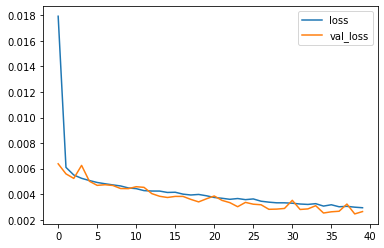

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [42]:
y_neu_pred = model.predict_classes(X_test)

In [43]:
print(confusion_matrix(y_test, y_neu_pred))
print('\n')
print(classification_report(y_test,y_neu_pred ))         #Best predictor by far on the set

[[278886    145]
 [   209    461]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279031
           1       0.76      0.69      0.72       670

    accuracy                           1.00    279701
   macro avg       0.88      0.84      0.86    279701
weighted avg       1.00      1.00      1.00    279701

